# Homework #1: Predicting Fuel Consumption

### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: August  12th, 2:00 pm Kigali Time

***Team Members:*** 
DUSENGEYEZU LONGIN AND UYISABYE VALETINE

**IDs**: 220020609 AND 221000259

# **Introduction**

*Pollution is the introduction of harmful materials into the environment. this hamful materials are either solid, liquid, gas or any form of energy such as heat, sound, or radioactivity.*

Pollution is a big issue in the city of Kigali. Policy makers in the city want to take action and deploy some measures to address this problem. You have been hired as a machine learning expert to analyze some data and help them make good decisions.

Cars that consume more fuel pollute more. As a first step, we want to estimate how much fuel each individual car consumes every 100 km. The provided dataset concerns city-cycle fuel consumption in liters per 100 kilometers (target).

The aim of this homework is to help you apply the skills that you have learned so far to a real dataset. This involves learning what data means, how to handle and visualize data, training, cross validation, prediction, testing your model, etc

*To reach our target, we must have lowest MSE on testing dataset after submssion. Thus we have tried many different machine learning models for regression. Since our target was numerical continous.*

In [ ]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#import libraries for implementing neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

# plot 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Competition Data
Run all the steps below to obtain the data

In [ ]:
# Read training data
train_data = pd.read_csv('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/train.csv') # read in the data as a DataFrame
train_data.head(3) # show the first 3 rows of the dataset

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,fuel (L/100km)
0,4,106.0,63.00,2123.0,14.7,82,1,"""amc hornet""",6.189737
1,8,400.0,150.0,3760.0,8.5,70,1,"""dodge challenger se""",15.680667
2,4,104.0,70.00,2150.0,13.9,79,1,"""honda civic cvcc""",6.817681


In [ ]:
# Read test data 
test_data = pd.read_csv('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/test.csv') # read in the data as a DataFrame
test_data.head(3) # show the first 3 rows of the dataset

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,4,122.0,80.0,2450.0,15.5,74,1,"""ford galaxie 500"""
1,6,257.0,95.0,3191.0,17.8,76,1,"""ford pinto"""
2,4,87.0,65.0,2108.0,18.9,80,3,"""plymouth duster"""


# Now we are done with downloading data! 
* Try building a model inside this notebook by create additional cells below with code to specify and fit the model
* If you are fitting large neural nets, make sure this google colab notebook is running on GPUs
* Check Edit --> Notebook settings --> Hardware accelerator: GPU

# Building our model after extracting data
##**EXPLORATORY ANALYSIS FOR TRAIN AND TEST DATA:**
*   **Identification of covariates.**
*   **Size of our datasets**
*   **Types of data annd identification of outilier**
*   **Making imputation where necessary**
*   **descriptive statistics/basic analysis : mean,max,min count,...**



In [ ]:
#get the summary of training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cylinders       298 non-null    int64  
 1   displacement    298 non-null    float64
 2   horsepower      298 non-null    object 
 3   weight          298 non-null    float64
 4   acceleration    298 non-null    float64
 5   model year      298 non-null    int64  
 6   origin          298 non-null    int64  
 7   car name        298 non-null    object 
 8   fuel (L/100km)  298 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 21.1+ KB


In [ ]:
#Describing data
train_data.describe()

,cylinders,displacement,weight,acceleration,model year,origin,fuel (L/100km)
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,5.412752,189.921141,2769.526846,15.643624,76.013423,1.577181,11.151093
std,1.683982,102.477761,1325.244375,2.808101,3.697276,0.792908,3.955753
min,3.000000,67.000000,-4294.000000,8.500000,70.000000,1.000000,5.273767
25%,4.000000,104.250000,2193.500000,13.925000,73.000000,1.000000,8.007588
50%,4.000000,145.500000,2737.000000,15.500000,76.000000,1.000000,10.226522
75%,6.000000,259.000000,3492.250000,17.300000,79.000000,2.000000,13.067222
max,8.000000,455.000000,5141.000000,24.700000,82.000000,3.000000,26.134444


*   **Fuel consomption is our target varible. As a discret variable, regression model can be used to perform the model that can fit our data** 

*   **some variables are not needed in this model: e.g Car name

1.   ***We need to drop car name***
2.   ***Encode records  like 'cylinders','horsepower','model year', and 'origin' covariates***



In [ ]:
#Droping unnecessary variables
train_data.drop(['car name'], axis=1, inplace=True)
train_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,fuel (L/100km)
0,4,106.0,63.00,2123.0,14.7,82,1,6.189737
1,8,400.0,150.0,3760.0,8.5,70,1,15.680667
2,4,104.0,70.00,2150.0,13.9,79,1,6.817681
3,4,92.0,68.00,-1971.0,17.6,82,3,7.587419
4,6,167.0,120.0,3819.0,16.7,76,2,14.255152


In [ ]:
#Finding and understanding variables
# Checking unique records in 'cylinders','horsepower','model year', 'origin' covariates
print("cylinders: ",train_data['cylinders'].unique())
print("horsepower: ",train_data['horsepower'].unique())
print("model year: ",train_data['model year'].unique())
print("origin: ",train_data['origin'].unique())

cylinders:  [4 8 6 5 3]
horsepower:  ['   63.00  ' '   150.0  ' '   70.00  ' '   68.00  ' '   120.0  '
 '   49.00  ' '   97.00  ' '   74.00  ' '   88.00  ' '   170.0  '
 '   90.00  ' '   130.0  ' '   140.0  ' '   165.0  ' '   115.0  '
 '   78.00  ' '   81.00  ' '   180.0  ' '   95.00  ' '   75.00  '
 '   ?      ' '   85.00  ' '   125.0  ' '   190.0  ' '   52.00  '
 '   198.0  ' '   87.00  ' '   100.0  ' '   83.00  ' '   64.00  '
 '   110.0  ' '   108.0  ' '   72.00  ' '   67.00  ' '   53.00  '
 '   105.0  ' '   80.00  ' '   98.00  ' '   91.00  ' '   60.00  '
 '   142.0  ' '   62.00  ' '   77.00  ' '   132.0  ' '   175.0  '
 '   148.0  ' '   71.00  ' '   145.0  ' '   46.00  ' '   93.00  '
 '   122.0  ' '   139.0  ' '   79.00  ' '   84.00  ' '   215.0  '
 '   76.00  ' '   65.00  ' '   133.0  ' '   92.00  ' '   86.00  '
 '   220.0  ' '   137.0  ' '   61.00  ' '   69.00  ' '   149.0  '
 '   200.0  ' '   152.0  ' '   103.0  ' '   155.0  ' '   208.0  '
 '   129.0  ' '   96.00  ' '   210.0  '

**The data shows that thereis no missing data nor unwanted discrepencies**

In [ ]:
# For each observation found in horsepower (whwere there is ?) column using Numpy
train_data.replace(train_data.iloc[23][['horsepower']],np.NaN,inplace=True)
#Converint the string to float 
train_data['horsepower'] = train_data['horsepower'].astype('float64')

#Imputing using the mean
mean_horsepower=train_data['horsepower'].mean()

train_data['horsepower'].replace(np.NaN,mean_horsepower,inplace=True)

# Visualizing the data

Text(0.5, 1.0, 'A Histogram of car model year')

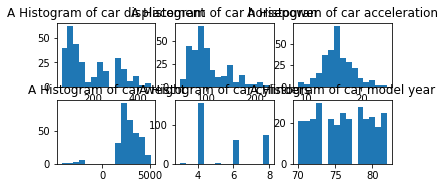

In [ ]:
#visualize displacent
plt.subplot(3,3,1, )
plt.hist(train_data['displacement'], bins = 15)
plt.title('A Histogram of car displacement')

plt.subplot(3,3,2)
plt.hist(train_data['horsepower'], bins = 15)
plt.title('A Histogram of car horsepower')

plt.subplot(3,3,3)
plt.hist(train_data['acceleration'], bins = 15)
plt.title('A Histogram of car acceleration')

plt.subplot(3,3,4)
plt.hist(train_data['weight'], bins = 15)
plt.title('A Histogram of car weight')

plt.subplot(3,3,5)
plt.hist(train_data['cylinders'], bins = 15)
plt.title('A Histogram of car cylinders')

plt.subplot(3,3,6)
plt.hist(train_data['model year'], bins = 15)
plt.title('A Histogram of car model year')

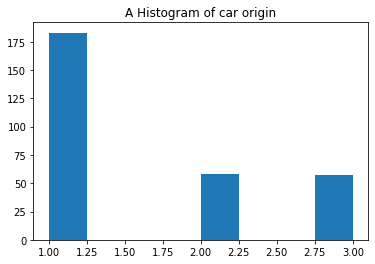

In [ ]:
plt.hist(train_data['origin'], bins = 8)
plt.title('A Histogram of car origin')
plt.show()

In [ ]:
#dealing with outlier in training dataset
#assign train_data to a new dataset for security purpose
train_data_clean=train_data
low = 0.05
high = .95
# Step 1: compute 5% percentile and the 95% percentile of each column in the dataset
quantile_df = train_data_clean.quantile([low, high])
quantile_df
#Size of training dataset bofore removing outlier 
print('Number of rows before outlier removal: {}'.format(train_data_clean.shape[0]))
#list_col = ['displacement', 'horsepower','weight', 'acceleration']
list_col = ['weight']
for column in list_col:
   train_data_clean = train_data_clean[(train_data_clean[column] > quantile_df.loc[0.05, column]) & (train_data_clean[column] < quantile_df.loc[0.95, column])]
#size of training data after removing outlier
print('Number of rows after outlier removal: {}'.format(train_data_clean.shape[0]))
train_data_clean.head()

Number of rows before outlier removal: 298
Number of rows after outlier removal: 268


,cylinders,displacement,horsepower,weight,acceleration,model year,origin,fuel (L/100km)
0,4,106.0,63.0,2123.0,14.7,82,1,6.189737
1,8,400.0,150.0,3760.0,8.5,70,1,15.680667
2,4,104.0,70.0,2150.0,13.9,79,1,6.817681
4,6,167.0,120.0,3819.0,16.7,76,2,14.255152
5,4,67.0,49.0,1865.0,18.5,73,2,8.110690


In [ ]:
# Preparing the Train dataset
#Defining Y_train
train_data_clean=train_data
y_train=train_data_clean['fuel (L/100km)']
y_train.head()

0     6.189737
1    15.680667
2     6.817681
3     7.587419
4    14.255152
Name: fuel (L/100km), dtype: float64

In [ ]:
#extract training covariates from training dataset
train_data_clean.drop(['fuel (L/100km)'], axis=1, inplace=True)
train_data_clean.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,4,106.0,63.0,2123.0,14.7,82,1
1,8,400.0,150.0,3760.0,8.5,70,1
2,4,104.0,70.0,2150.0,13.9,79,1
3,4,92.0,68.0,-1971.0,17.6,82,3
4,6,167.0,120.0,3819.0,16.7,76,2


In [ ]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     298 non-null    int64  
 1   displacement  298 non-null    float64
 2   horsepower    298 non-null    float64
 3   weight        298 non-null    float64
 4   acceleration  298 non-null    float64
 5   model year    298 non-null    int64  
 6   origin        298 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 16.4 KB


In [ ]:

## Encoding the covariate 'cylinders','model year','origin' on training dataset for prediction
train_df=train_data_clean
one_hot_cylinders_t = pd.get_dummies(train_df['cylinders'], prefix='cylinders')
one_hot_year_t = pd.get_dummies(train_df['model year'], prefix='model_year')
one_hot_origin_t = pd.get_dummies(train_df['origin'], prefix='origin')
train_df = pd.concat([train_df, one_hot_cylinders_t], axis=1)
train_df= pd.concat([train_df, one_hot_year_t], axis=1)
train_df = pd.concat([train_df, one_hot_origin_t], axis=1)
train_df.drop(['cylinders'], axis=1, inplace=True)
train_df.drop(['origin'], axis=1, inplace=True)
train_df.drop(['model year'], axis=1, inplace=True)
train_df.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_70,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3
0,106.0,63.0,2123.0,14.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,400.0,150.0,3760.0,8.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,104.0,70.0,2150.0,13.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,92.0,68.0,-1971.0,17.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,167.0,120.0,3819.0,16.7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
#Applying the train to test data
#summary of descriptive statistics on testing data
test_data.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.580000,204.130000,104.960000,3025.160000,15.643000,76.000000,1.560000
std,1.753381,109.301054,39.082384,855.939365,3.029827,3.717282,0.832666
min,3.000000,71.000000,46.000000,1772.000000,9.000000,70.000000,1.000000
25%,4.000000,99.000000,77.250000,2284.250000,13.575000,73.000000,1.000000
50%,6.000000,171.000000,95.000000,2859.500000,15.500000,76.000000,1.000000
75%,8.000000,302.500000,126.000000,3724.000000,17.850000,79.000000,2.000000
max,8.000000,456.000000,225.000000,4949.000000,23.600000,82.000000,3.000000


In [ ]:
#dropping 'car name'
test_data.drop(['car name'], axis=1,inplace=True)
test_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,4,122.0,80.0,2450.0,15.5,74,1
1,6,257.0,95.0,3191.0,17.8,76,1
2,4,87.0,65.0,2108.0,18.9,80,3
3,8,399.0,167.0,4906.0,12.5,73,1
4,8,399.0,150.0,4462.0,13.0,73,1


In [ ]:
# one hot encode the covariate 'cylinders','model year','origin' on testing dataset
#set the new testing dataset for security purpose of loosing data
test_data_clean=test_data
one_hot_cylinders_t = pd.get_dummies(test_data_clean['cylinders'], prefix='cylinders')
one_hot_year_t = pd.get_dummies(test_data_clean['model year'], prefix='model_year')
one_hot_origin_t = pd.get_dummies(test_data_clean['origin'], prefix='origin')
test_data_clean = pd.concat([test_data_clean, one_hot_cylinders_t], axis=1)
test_data_clean = pd.concat([test_data_clean, one_hot_year_t], axis=1)
test_data_clean = pd.concat([test_data_clean, one_hot_origin_t], axis=1)
test_data_clean.drop(['cylinders'], axis=1, inplace=True)
test_data_clean.drop(['model year'], axis=1, inplace=True)
test_data_clean.drop(['origin'], axis=1, inplace=True)

In [ ]:
# Checking
train_df.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_70,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3
0,106.0,63.0,2123.0,14.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,400.0,150.0,3760.0,8.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,104.0,70.0,2150.0,13.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,92.0,68.0,-1971.0,17.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,167.0,120.0,3819.0,16.7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
#drop cylinders_5 for balancing the two dataset; training and testing
train_df.drop(['cylinders_5'], axis=1, inplace=True)

In [ ]:
test_data_clean.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_6,cylinders_8,model_year_70,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3
0,122.0,80.0,2450.0,15.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,257.0,95.0,3191.0,17.8,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,87.0,65.0,2108.0,18.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,399.0,167.0,4906.0,12.5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,399.0,150.0,4462.0,13.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


****

In [ ]:
# Preparing covariates / predictable from X_test dataset
columns_df=test_data_clean.columns
X_train=train_df

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   displacement   298 non-null    float64
 1   horsepower     298 non-null    float64
 2   weight         298 non-null    float64
 3   acceleration   298 non-null    float64
 4   cylinders_3    298 non-null    uint8  
 5   cylinders_4    298 non-null    uint8  
 6   cylinders_6    298 non-null    uint8  
 7   cylinders_8    298 non-null    uint8  
 8   model_year_70  298 non-null    uint8  
 9   model_year_71  298 non-null    uint8  
 10  model_year_72  298 non-null    uint8  
 11  model_year_73  298 non-null    uint8  
 12  model_year_74  298 non-null    uint8  
 13  model_year_75  298 non-null    uint8  
 14  model_year_76  298 non-null    uint8  
 15  model_year_77  298 non-null    uint8  
 16  model_year_78  298 non-null    uint8  
 17  model_year_79  298 non-null    uint8  
 18  model_year

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   displacement   298 non-null    float64
 1   horsepower     298 non-null    float64
 2   weight         298 non-null    float64
 3   acceleration   298 non-null    float64
 4   cylinders_3    298 non-null    uint8  
 5   cylinders_4    298 non-null    uint8  
 6   cylinders_6    298 non-null    uint8  
 7   cylinders_8    298 non-null    uint8  
 8   model_year_70  298 non-null    uint8  
 9   model_year_71  298 non-null    uint8  
 10  model_year_72  298 non-null    uint8  
 11  model_year_73  298 non-null    uint8  
 12  model_year_74  298 non-null    uint8  
 13  model_year_75  298 non-null    uint8  
 14  model_year_76  298 non-null    uint8  
 15  model_year_77  298 non-null    uint8  
 16  model_year_78  298 non-null    uint8  
 17  model_year_79  298 non-null    uint8  
 18  model_year

In [ ]:
## Feature scalling
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
test_data_clean=scaler.fit_transform(test_data_clean)
print("X_train: ",X_train[1])
print("test data: ",test_data_clean[1])

X_train:  [0.85824742 0.56521739 0.8536301  0.         0.         0.
 0.         1.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.        ]
test data:  [0.48311688 0.27374302 0.44664778 0.60273973 0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         1.         0.         0.        ]


# Model 1**Linear regression Model**

In [ ]:
#working with linear regression
#define linear regression
linear_regression=LinearRegression()
#fit the data
linear_regression.fit(X_train,y_train)
#make prediction on testing
y_pred_test=linear_regression.predict(test_data_clean)
#make predictions on training
y_pred_train=linear_regression.predict(X_train)


In [ ]:
#Swowing the heading for interpretation of coefficients
print(columns_df)
#compute mse on training
mse_train=mean_squared_error(y_train,y_pred_train)
#print coefficients
print("model coefficients:",linear_regression.coef_)
#print interceipt
print("model interceipt:",linear_regression.intercept_)
#printing score on training
print("The model can predict (%): ",r2_score(y_train,y_pred_train))
#printing mse on training
print("The MSE for train is: ",mse_train)

Index(['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders_3',
       'cylinders_4', 'cylinders_6', 'cylinders_8', 'model_year_70',
       'model_year_71', 'model_year_72', 'model_year_73', 'model_year_74',
       'model_year_75', 'model_year_76', 'model_year_77', 'model_year_78',
       'model_year_79', 'model_year_80', 'model_year_81', 'model_year_82',
       'origin_1', 'origin_2', 'origin_3'],
      dtype='object')
model coefficients: [ 1.79134426  9.86824121  0.05013393  3.99340934  1.95138758 -0.91128971
  0.35556421  1.52612764  0.7932023   0.81741684  1.3893321   1.37726428
  0.55270235  1.18534852  0.47623901 -0.50947079 -0.51073941 -1.39277759
 -1.51930315 -1.22125063 -1.43796381  0.28397839 -0.05838393 -0.22559446]
model interceipt: 5.5415186544656025
The model can predict (%):  0.8756950301197219
The MSE for train is:  1.9385947600001465


In [ ]:
#Predicting the Y values
predictions=pd.DataFrame(y_pred_test,columns=['predictions'])
# creating a key identifyier
index =predictions.index
index.name = "id"
predictions.head()

,predictions
id,
0,9.367206
1,12.653470
2,6.720406
3,17.932511
4,17.125058


In [ ]:
# saving and downloading csv file from ridge
predictions.to_csv('predictions_reg.csv')
from google.colab import files
files.download('predictions_reg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# polynomial


# Model 2: Lineal regression with regularization

In [ ]:
# Step 1: Define the polynomial features
degree = 2
features = PolynomialFeatures(degree)
# Step 2: Transform training and test input with PolynomialFeatures
X_train_poly = features.fit_transform(X_train)
X_test_poly = features.fit_transform(test_data_clean)
ridge_regression = Ridge(alpha=0.000000000001)
# Step 4: Fit the regression model
ridge_regression.fit(X_train_poly, y_train)
# Step 5: Compute the train MSE
y_train_mse = mean_squared_error(y_train, ridge_regression.predict(X_train_poly))
#compute mse on tarining
y_train_r2=r2_score(y_train, ridge_regression.predict(X_train_poly))
#compute the predictions on testing.
y_pred_test=(ridge_regression.predict(X_test_poly))
#printing mse, score on training
print('MSE on Training Data:', y_train_mse)
print('The model can predict (%):', y_train_r2)

MSE on Training Data: 0.5944407666741298
The model can predict (%): 0.9618837607932915


In [ ]:
#make the predictions dataframe
predictions=pd.DataFrame(y_pred_test,columns=['predictions'])
index =predictions.index
index.name = "id"
predictions.head()

,predictions
id,
0,7.782852
1,13.168046
2,9.725854
3,20.339599
4,18.866036


In [ ]:
# saving and downloading csv file from ridge
predictions.to_csv('predictions_0.csv')
from google.colab import files
files.download('predictions_0.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Neural network

In [ ]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split

In [ ]:
# degree = 4
# features = PolynomialFeatures(degree)
# # Step 2: Transform training and test input with PolynomialFeatures
# X_train_poly = features.fit_transform(X_train)
# X_test_poly = features.fit_transform(test_data_clean)
# regr = MLPRegressor(hidden_layer_sizes=(400,30),random_state=1, max_iter=10000,alpha=200).fit(X_train_poly, y_train)


In [ ]:

# y_pred_test=regr.predict(X_test_poly)
# #make predictions on training
# y_pred_train=regr.predict(X_train_poly)

In [ ]:

# mse_train=mean_squared_error(y_train,y_pred_train)
# print("The MSE for train is: ",mse_train)
# #printing score on training
# print("The model can predict (%): ",r2_score(y_train,y_pred_train))
# #printing mse on training


In [ ]:
# #Predicting the Y values
# predictions=pd.DataFrame(y_pred_test,columns=['predictions'])
# # creating a key identifyier
# index =predictions.index
# index.name = "id"
# predictions.head()

In [ ]:
# # saving and downloading csv file from ridge
# predictions.to_csv('predictions_neural.csv')
# from google.colab import files
# files.download('predictions_neural.csv')

# Model 3 : Ridge regulalization

In [ ]:
#defining ridge
ridge_regression = Ridge(alpha=30)
#fit the data
ridge_regression.fit(X_train, y_train)
#compute mse on training
y_train_mse = mean_squared_error(y_train, ridge_regression.predict(X_train))
#compute score
y_train_r2=r2_score(y_train, ridge_regression.predict(X_train))
#make predictions on testing data
y_pred_test=ridge_regression.predict(test_data_clean)
#print mse and score on training
print('MSE on Training Data:', y_train_mse)
print('The model can predici (%):', y_train_r2)


MSE on Training Data: 3.2172932080741368
The model can predici (%): 0.7937033857836031


In [ ]:
#make predictions dataframe
predictions=pd.DataFrame(y_pred_test,columns=['predictions'])
index =predictions.index
index.name = "id"
predictions.head()

,predictions
id,
0,9.455704
1,12.139858
2,7.123750
3,16.568259
4,16.345497


In [ ]:
# saving and downloading csv file from ridge
predictions.to_csv('predictions_L2.csv')
from google.colab import files
files.download('predictions_L2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model4: **Using KNN for prediction**

In [ ]:
# Defining KNN model
model = neighbors.KNeighborsRegressor(n_neighbors = 4)
#fit the model
model.fit(X_train,y_train)
#make predictions on test data
y_pred_test=model.predict(test_data_clean)
#make predictions on training
y_pred_train=model.predict(X_train)


In [ ]:
#Calculating the mse on training
mse_train=mean_squared_error(y_train,y_pred_train)
#Calculating the mse and score on training
print("The model can predict (%): ",r2_score(y_train,y_pred_train))
print("MSE of the trainning data is: ",mse_train)

The model can predict (%):  0.9141471619450605
MSE of the trainning data is:  1.3389155891735016


In [ ]:
#make predictions dataframe
predictions=pd.DataFrame(y_pred_test,columns=['predictions'])
index =predictions.index
index.name = "id"
predictions.head()

,predictions
id,
0,8.717951
1,10.676515
2,6.539221
3,19.292429
4,18.312387


In [ ]:
# saving and downloading csv file from ridge
predictions.to_csv('predictions_1.csv')
from google.colab import files
files.download('predictions_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODEL 5:Decision Tree regression**. 
*We were trying to keep the model complex but also more fitting.*

In [ ]:
#working with linear regression
#define model
regr = DecisionTreeRegressor(max_depth=3)
#fit the model
regr.fit(X_train,y_train)
#make predictions over testing
y_pred_test=regr.predict(test_data_clean)
#make predictions on training
y_pred_train=regr.predict(X_train)


In [ ]:
#compute mse on training
mse_train=mean_squared_error(y_train,y_pred_train)
#print mse and score for training
print("The model can predict (%) ",r2_score(y_train,y_pred_train))
print("THe MSE for training data is: ",mse_train)

The model can predict (%)  0.8393400905370755
THe MSE for training data is:  2.505567226530804


In [ ]:
#make predictions dataframe
predictions=pd.DataFrame(y_pred_test,columns=['predictions'])
index =predictions.index
index.name = "id"
predictions.head()

,predictions
id,
0,7.609165
1,11.967303
2,7.609165
3,18.092789
4,15.940808


In [ ]:
# saving and downloading csv file from Decision tree
predictions.to_csv('predictions_2.csv')
from google.colab import files
files.download('predictions_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Here's a sample submission file
sample_submission = pd.read_csv('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/sampleSubmission.csv') # read in the data as a DataFrame
sample_submission.head(3) # show the first 3 rows of the dataset

,id,predictions
0,0,22.661621
1,1,6.381661
2,2,21.673614


In [ ]:
# Save your predictions to a DataFrame
# my_submission = model.predict(test_data)

# Save submission file
# my_submission.to_csv('my_submission.csv', index=False)

In [ ]:
# Check that your submission looks the same as the samples submission
# pd.read_csv('my_submission.csv')

# Save and download the submission file and upload to the Kaggle website

Then download `my_submission.csv` by running the following line and submit to the [Kaggle](https://www.kaggle.com/t/b9bc778c9e8842d28c5526f578e6c348) compeition website.

In [ ]:
# files.download('my_submission.csv') 